# Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

## Imports

In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer

pd.set_option("display.max_columns", 100)

In [98]:
train_features = pd.read_csv("data/training_set_features.csv", index_col="respondent_id")
train_labels = pd.read_csv("data/training_set_labels.csv", index_col="respondent_id")
test_features = pd.read_csv("data/test_set_features.csv", index_col="respondent_id")

In [99]:
def tableDetails(df):
    print("Table Details")
    print("\nTable Shape" ,df.shape, sep='\n')
    print("\nTop five rows" ,df.head(), sep='\n')    
    
def columnDetails(df):
    print(df.info())
    print(df.describe())

def columnAnalysis(df,colarr):    
    print(df.columns)

In [100]:
# train_features.drop(['employment_industry', 'employment_occupation'], axis=1,inplace=True)
# train_features.drop(['employment_industry', 'employment_occupation','health_insurance'], axis=1,inplace=True)
# test_features.drop(['employment_industry', 'employment_occupation'], axis=1,inplace=True)
# test_features.drop(['employment_industry', 'employment_occupation','health_insurance'], axis=1,inplace=True)

In [101]:
columns = train_features.columns.tolist()
col_sums = (train_features.isnull().sum()).to_list()
col_per = (train_features.isnull().mean().round(5)*100).to_list()
nullDf = pd.DataFrame(
    {'cols': columns,
     'nullentries': col_sums,
     'nullpercentage': col_per
    })

In [102]:
columns = test_features.columns.tolist()
col_sums = (test_features.isnull().sum()).to_list()
col_per = (test_features.isnull().mean().round(5)*100).to_list()
col_nquniue = test_features.nunique().to_list()
nullDfTest = pd.DataFrame(
        {'cols': columns,
         'nullentries': col_sums,
         'nullpercentage': col_per,
         'nunique': col_nquniue
        })

In [94]:
def fillColumnModes(df, arr):
    for col in arr:
#         df[col]=df[col].fillna(method='ffill')
        df[col]=df[col].fillna(df[col].mode()[0])
    return df

In [95]:
train_null_cols = nullDf[nullDf['nullentries'] != 0].cols.to_list()
train_features = fillColumnModes(train_features,train_null_cols)

In [96]:
test_null_cols = nullDf[nullDf['nullentries'] != 0].cols.to_list()
test_features = fillColumnModes(test_features,train_null_cols)

In [29]:
# sns.heatmap(test_features.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
# train_features = pd.get_dummies(train_features, columns=['race','sex','marital_status','rent_or_own','hhs_geo_region','employment_status','census_msa','age_group','education','income_poverty'],drop_first=True)
# test_features = pd.get_dummies(test_features, columns=['race','sex','marital_status','rent_or_own','hhs_geo_region','employment_status','census_msa','age_group','education','income_poverty'],drop_first=True)

In [103]:
cat_columns = train_features.select_dtypes(include=['object']).columns.to_list()
for col in cat_columns:
    train_features[col] = train_features[col].astype('category')
    train_features[col] = train_features[col].cat.codes
    test_features[col] = test_features[col].astype('category')
    test_features[col] = test_features[col].cat.codes

## Data Modeling

In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,AdaBoostRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier


from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 27    # Set a random seed for reproducibility!

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import uniform
import xgboost as xgb

In [110]:

xgClass = xgb.XGBClassifier(objective='reg:logistic',random_state=27,
n_estimators=100, gamma = 10, colsample_bytree = 0.3,metrics="rmse", max_depth = 4, alpha = 5,
learning_rate=0.85, verbosity=0,n_jobs=6)
distributions = dict(learning_rate=[1,.5,.1,.05,.01],
                     n_estimators=[10,50,100,200])

clf = RandomizedSearchCV(xgClass, distributions, random_state=27)
# clf.fit(X_train, y_train).score(X_eval, y_eval)
# clf.fit(X_train, y_train).best_params_
                                  
pipe= Pipeline([
                ('scalar', MinMaxScaler()),
              ('clf', clf)]
            )

In [111]:
pipe.fit(X_train, y_train).score(X_eval, y_eval)

0.8384388472884048

In [72]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=27)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])

clf = RandomizedSearchCV(logistic, distributions, random_state=27)
clf.fit(X_train, y_train).score(X_eval, y_eval)

0.8340140685273428

In [112]:
ada = AdaBoostClassifier(learning_rate=.5,n_estimators=150, random_state=RANDOM_SEED)
distributions = dict(learning_rate=uniform(loc=0, scale=4),
                     n_estimators=[10,50,100,200])

clf = RandomizedSearchCV(ada, distributions, random_state=27)
# clf.fit(X_train, y_train).score(X_eval, y_eval)
# clf.fit(X_train, y_train).best_params_
                                  
pipe= Pipeline([
#             [('reduce_dim', PCA(n_components=10)), 
                ('scalar', MinMaxScaler()),
              ('clf', clf)]
            )

In [113]:
pipe.fit(X_train, y_train).score(X_eval, y_eval)

0.8362831858407079

In [64]:
clf1 = AdaBoostClassifier(learning_rate=.5,n_estimators=150, random_state=RANDOM_SEED)
clf2 = GradientBoostingClassifier(learning_rate=.5,random_state=RANDOM_SEED)
clf3 = LogisticRegression(penalty="l2",solver="newton-cg", C=10)
classifier = VotingClassifier(estimators=[('ab', clf1), ('gb', clf2), ('lr', clf3)], voting='soft')
                                  
estimators = [
#             ('reduce_dim', PCA(n_components=10)), 
              ('clf', classifier)
            ]



In [65]:
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('clf',
                 VotingClassifier(estimators=[('ab',
                                               AdaBoostClassifier(learning_rate=0.5,
                                                                  n_estimators=150,
                                                                  random_state=27)),
                                              ('gb',
                                               GradientBoostingClassifier(learning_rate=0.5,
                                                                          random_state=27)),
                                              ('lr',
                                               LogisticRegression(C=10,
                                                                  solver='newton-cg'))],
                                  voting='soft'))])

In [66]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train_features,
    train_labels['h1n1_vaccine'],
    test_size=0.33,
    shuffle=True,
    stratify=train_labels['h1n1_vaccine'],
    random_state=RANDOM_SEED
)

In [67]:
pipe.fit(X_train, y_train).score(X_eval, y_eval)

0.8396868618107556

In [256]:
scalar = StandardScaler()
# scalar = MinMaxScaler()
# scalar = RobustScaler()
# scalar = Normalizer()
X= scalar.fit_transform(train_features)

In [257]:
# import category_encoders as ce
# encoding_pipeline = Pipeline([
#   ('encode_categories', ce.OneHotEncoder(cols=['race','sex','marital_status','rent_or_own','hhs_geo_region','employment_status','census_msa'], return_df=True)),
#   ('encode_ordinals', ce.OrdinalEncoder(cols=['age_group','education','income_poverty'],return_df=True))
# ])

# # Get the encoded training set:
# df_train_encoded = encoding_pipeline.fit_transform(X, y['h1n1_vaccine'])
# df_train_encoded['age_group']
# X = df_train_encoded

In [258]:
X= train_features
y= train_labels

In [259]:
X_train, X_eval, y_train, y_eval = train_test_split(
    X,
    y,
    test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED
)

In [273]:
# classifier = MultiOutputClassifier(estimator=GaussianNB())
# classifier = MultiOutputClassifier(estimator=MLPClassifier(hidden_layer_sizes=(150,100,150), max_iter=300,verbose=1,activation = 'relu',solver='adam',random_state=1))
classifier = MultiOutputClassifier(estimator=AdaBoostClassifier(learning_rate=.5,n_estimators=150, random_state=RANDOM_SEED))
# classifier = MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=8, warm_start=True , random_state=RANDOM_SEED))
# classifier = MultiOutputClassifier(estimator=LogisticRegression(penalty="l2",solver="newton-cg", C=10))
# classifier = MultiOutputClassifier(estimator=GradientBoostingClassifier(learning_rate=.5,random_state=RANDOM_SEED))
# classifier = MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=12, random_state=0))
# classifier = MultiOutputClassifier(estimator=SVC(gamma='auto'))
# classifier = MultiOutputClassifier(estimator=BaggingClassifier(base_estimator=LogisticRegression(penalty="l2",solver="newton-cg", C=10), n_estimators=10,random_state=RANDOM_SEED))

In [274]:
clf1 = AdaBoostClassifier(learning_rate=.5,n_estimators=150, random_state=RANDOM_SEED)
clf2 = GradientBoostingClassifier(learning_rate=.5,random_state=RANDOM_SEED)
clf3 = LogisticRegression(penalty="l2",solver="newton-cg", C=10)


classifier = MultiOutputClassifier(estimator=VotingClassifier(estimators=[('ab', clf1), ('gb', clf2), ('lr', clf3)], voting='soft'))

In [276]:

# classifier = xgb.XGBClassifier(objective='reg:logistic',random_state=27,
# n_estimators=100, gamma = 10, colsample_bytree = 0.3,metrics="rmse", max_depth = 4, alpha = 5,
# learning_rate=0.85, verbosity=0,n_jobs=6)

# classifier.fit(X_train,y_train['h1n1_vaccine'])
# classifier.score(X_eval,y_eval['h1n1_vaccine'])

In [275]:
# classifier2 = xgb.XGBClassifier(objective='reg:logistic', random_state=27,
# n_estimators=100, gamma = 1, colsample_bytree = 0.3,metrics="rmse", max_depth = 5, alpha = 10,
# learning_rate=.01, verbosity=0, n_jobs=6)
# classifier2.fit(X_train,y_train['seasonal_vaccine'])
# classifier2.score(X_eval,y_eval['seasonal_vaccine'])

In [277]:
# classifier2 = MultiOutputClassifier(estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=27,
# n_estimators=100, gamma = 10, colsample_bytree = 0.1, max_depth = 5, alpha = 10,
# learning_rate=.1, verbosity=0, n_jobs=6))
# classifier2.fit(X_train,y_train)
# classifier2.score(X_eval,y_eval)

In [ ]:
# classifier = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3,metrics="rmse", learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# classifier = MultiOutputClassifier(estimator=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10))

In [278]:
classifier.fit(X_train,y_train)

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('ab',
                                                              AdaBoostClassifier(learning_rate=0.5,
                                                                                 n_estimators=150,
                                                                                 random_state=27)),
                                                             ('gb',
                                                              GradientBoostingClassifier(learning_rate=0.5,
                                                                                         random_state=27)),
                                                             ('lr',
                                                              LogisticRegression(C=10,
                                                                                 solver='newton-cg'))],
                                                 voting='soft'))

In [279]:
preds = classifier.predict_proba(X_eval)
preds

[array([[0.46803785, 0.53196215],
        [0.70220301, 0.29779699],
        [0.74650827, 0.25349173],
        ...,
        [0.73248951, 0.26751049],
        [0.75350366, 0.24649634],
        [0.79586075, 0.20413925]]),
 array([[0.28184213, 0.71815787],
        [0.62191902, 0.37808098],
        [0.49345915, 0.50654085],
        ...,
        [0.77550641, 0.22449359],
        [0.67715482, 0.32284518],
        [0.69506953, 0.30493047]])]

## Data Hypertuning

In [280]:
# classifier.score(X_eval,y_eval['h1n1_vaccine'])

## Validation Prediction

In [281]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
11165,0.531962,0.718158
1765,0.297797,0.378081
15706,0.253492,0.506541
21220,0.190522,0.215106
2858,0.262075,0.425213


In [282]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

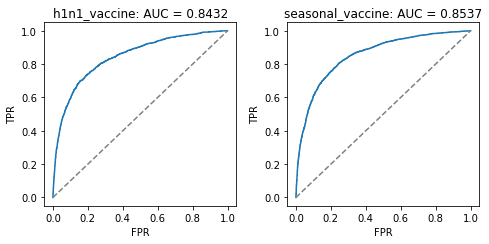

In [283]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [284]:
roc_auc_score(y_eval, y_preds)

0.8484556412435016

## Test Prediction

In [286]:
# df_train_transformed.columns

In [287]:
test_features_df = test_features

In [290]:
# df_test_transformed = encoder.transform(test_features_df)
test_probas = classifier.predict_proba(test_features_df)
test_probas

[array([[0.77013951, 0.22986049],
        [0.80934071, 0.19065929],
        [0.55071256, 0.44928744],
        ...,
        [0.75141927, 0.24858073],
        [0.80711784, 0.19288216],
        [0.47630727, 0.52369273]]),
 array([[0.6875214 , 0.3124786 ],
        [0.8183301 , 0.1816699 ],
        [0.31124706, 0.68875294],
        ...,
        [0.65944692, 0.34055308],
        [0.58933951, 0.41066049],
        [0.47600649, 0.52399351]])]

In [291]:
test_probas = classifier.predict_proba(test_features_df)
test_probas

[array([[0.77013951, 0.22986049],
        [0.80934071, 0.19065929],
        [0.55071256, 0.44928744],
        ...,
        [0.75141927, 0.24858073],
        [0.80711784, 0.19288216],
        [0.47630727, 0.52369273]]),
 array([[0.6875214 , 0.3124786 ],
        [0.8183301 , 0.1816699 ],
        [0.31124706, 0.68875294],
        ...,
        [0.65944692, 0.34055308],
        [0.58933951, 0.41066049],
        [0.47600649, 0.52399351]])]

## Submission

In [292]:
submission_df = pd.read_csv("data/submission_format.csv", index_col="respondent_id")

In [293]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [294]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.229860,0.312479
26708,0.190659,0.181670
26709,0.449287,0.688753
26710,0.553601,0.724860
26711,0.290636,0.505621


In [295]:
submission_df.to_csv('my_submission3.csv', index=True)

In [614]:
!head my_submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.
